# Best Results Overall

- Best Model: Stacking Classifier - Decision Tree, Random Forest, Linear SVC, LDA, Logistic Regression, OverSampling Random Forest
- Final Estimator used: OverSampled XG Boost (All the base estimators were selected based on best correlation)
- Best parameters: {'stack_method': 'predict_proba'}
- Mean Cross validation score of Best model: 0.8890022990595179
- Test score of best model: 0.8108108108108107
- Train score of best model: 0.9282700421940927


## Importing Test Dataset

In [1]:
import pandas as pd
#test dataset

df_test=pd.read_csv('test.csv')
test = df_test.copy()

In [2]:
df_test=df_test.drop(['Id'], axis=1)
df_test.shape

(24846, 29)

In [3]:
missing_data_columns= list(df_test.columns[df_test.isnull().mean()>0.0])
print(missing_data_columns)
len(missing_data_columns)

['V1', 'V20']


2

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine import variable_transformers as vt
from sklearn.impute import SimpleImputer

data_pre_process = Pipeline([
    
    # missing data imputation 
   ('mean_median_imputation', mdi.MeanMedianImputer(imputation_method='median',
                                   variables=missing_data_columns)),
   
    # Transforming Numerical Variables
   ('yjt', YeoJohnsonTransformer()),

    # feature Scaling
     ('scaler', RobustScaler())
    
])

In [5]:
data_pre_process.fit(df_test)

Pipeline(memory=None,
         steps=[('mean_median_imputation',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['V1', 'V20'])),
                ('yjt',
                 YeoJohnsonTransformer(variables=['V1', 'V2', 'V3', 'V4', 'V5',
                                                  'V6', 'V7', 'V8', 'V9', 'V10',
                                                  'V11', 'V12', 'V13', 'V14',
                                                  'V15', 'V16', 'V17', 'V18',
                                                  'V19', 'V20', 'V21', 'V22',
                                                  'V23', 'V24', 'V25', 'V26',
                                                  'V27', 'V28', 'V29'])),
                ('scaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True))],
         verbose=False)

In [6]:
df_test=data_pre_process.transform(df_test)

## Stacking Classifier

In [7]:
import pickle
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import GridSearchCV

In [22]:
#Making f2 scorer for Grid search CV
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [23]:
logreg = pickle.load(open('logreg_model.sav', 'rb'))
knn = pickle.load(open('knn_model.sav', 'rb'))
dtree = pickle.load(open('dtree_model.sav', 'rb'))
lsvc = pickle.load(open('lsvc_model.sav', 'rb'))
etc = pickle.load(open('etc_model.sav', 'rb'))
gbc = pickle.load(open('gbc_model.sav', 'rb'))
xgbc = pickle.load(open('xgbc_model.sav', 'rb'))
rfc = pickle.load(open('rfc_model.sav', 'rb'))
lgbm = pickle.load(open('lgbm_model.sav', 'rb'))
catboost = pickle.load(open('catboost_model.sav', 'rb'))
gpc = pickle.load(open('gpc_model.sav', 'rb'))
bnb = pickle.load(open('bnb_model.sav', 'rb'))
gnb = pickle.load(open('gnb_model.sav', 'rb'))
lda = pickle.load(open('lda_model.sav', 'rb'))
qda = pickle.load(open('qda_model.sav', 'rb'))
cs_dtree = pickle.load(open('cs_dtree_model.sav', 'rb'))
cs_etc = pickle.load(open('cs_etc.sav', 'rb'))
cs_etc2 = pickle.load(open('cs_etc2.sav', 'rb'))
cs_logreg = pickle.load(open('cs_logreg_model.sav', 'rb'))
cs_rfc = pickle.load(open('cs_rfc.sav', 'rb'))
cs_xgb = pickle.load(open('cs_xgb.sav', 'rb'))
cs_ksvc = pickle.load(open('cs_ksvc_grid.sav', 'rb'))
os_dtree = pickle.load(open('os_dtree_svmsmote.sav', 'rb'))
os_knn = pickle.load(open('os_knn_svmsmote.sav', 'rb'))
os_log = pickle.load(open('os_log_svmsmote.sav', 'rb'))
os_log_smote = pickle.load(open('os_log_smote.sav', 'rb'))
os_rfc = pickle.load(open('os_rf_svmsmote.sav', 'rb'))
os_xgb = pickle.load(open('os_xgb_svmsmote.sav', 'rb'))
os_eec = pickle.load(open('grid_eec_svmsmote.sav', 'rb'))
os_mlp = pickle.load(open('os_mlp_svmsmote.sav', 'rb'))
os_lgbm = pickle.load(open('os_lgbm_svmsmote.sav', 'rb'))
os_catboost = pickle.load(open('os_catboost_svmsmote.sav', 'rb'))
os_bnb = pickle.load(open('os_bnb_svmsmote.sav', 'rb'))
os_gnb = pickle.load(open('os_gnb_svmsmote.sav', 'rb'))
os_lda = pickle.load(open('os_lda_svmsmote.sav', 'rb'))
os_qda= pickle.load(open('os_qda_svmsmote.sav', 'rb'))

In [24]:
classifiers={
             
'logreg':logreg,
'knn':knn ,
'dtree':dtree,
'lsvc' :lsvc ,
'etc' : etc ,
'gbc' :gbc ,
'xgbc' :xgbc,
'rfc' :rfc,
'lgbm' :	lgbm,
'catboost' :	catboost,
'gpc' :	gpc,
'bnb':bnb,
'gnb':gnb,
'lda':lda,
'qda':qda,
'cs_dtree' :	cs_dtree,
'cs_etc' :	cs_etc,
'cs_etc2' :	cs_etc2, 
'cs_logreg' :	cs_logreg,
'cs_rfc' :	cs_rfc ,
'cs_xgb' :	cs_xgb ,
'cs_ksvc'	: cs_ksvc,
'os_dtree' :	os_dtree,
'os_knn' :	os_knn ,
'os_log' :	os_log,
'os_log_smote' :	os_log_smote,
'os_rfc' :	os_rfc ,
'os_xgb' :	os_xgb ,
'os_eec' 	: os_eec, 
'os_mlp'	: os_mlp,
'os_lgbm' :	os_lgbm ,
'os_catboost' : 	os_catboost,
'os_bnb':os_bnb,
'os_gnb':os_gnb,
'os_lda':os_lda,
'os_qda':os_qda
            }

'''
classifiers={'knn':knn_grid ,
             'logreg':logreg_grid,
             'lsvc':lsvc_grid,
             'ksvc':ksvc_grid,
             'dtree':dtree_grid,
             'bag_dtree1':bag_dtree1_grid,
             'bag_dtree1':bag_dtree2_grid,
             'bag_logreg1':bag_logreg1_grid,
            'paste_dtree1': paste_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}
'''

"\nclassifiers={'knn':knn_grid ,\n             'logreg':logreg_grid,\n             'lsvc':lsvc_grid,\n             'ksvc':ksvc_grid,\n             'dtree':dtree_grid,\n             'bag_dtree1':bag_dtree1_grid,\n             'bag_dtree1':bag_dtree2_grid,\n             'bag_logreg1':bag_logreg1_grid,\n            'paste_dtree1': paste_dtree1_grid,\n             'paste_dtree1':paste_dtree2_grid,\n             'paste_logreg1': paste_logreg1_grid,\n             'rfc': rfc_grid,\n             'etc': etc_grid,\n             'adc_dtree':adc_dtree_grid,\n             'gbc': gbc_grid,\n             'xgbc': xgbc_grid}\n"

In [25]:


classifiers.keys()

results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
27,os_xgb,0.883509,0.061313
23,os_knn,0.881053,0.073804
17,cs_etc2,0.879537,0.057380
16,cs_etc,0.878576,0.056515
20,cs_xgb,0.877667,0.054988
6,xgbc,0.872884,0.052155
26,os_rfc,0.871437,0.064996
31,os_catboost,0.869272,0.047512
19,cs_rfc,0.866473,0.069106
9,catboost,0.864547,0.061857


In [26]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [27]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

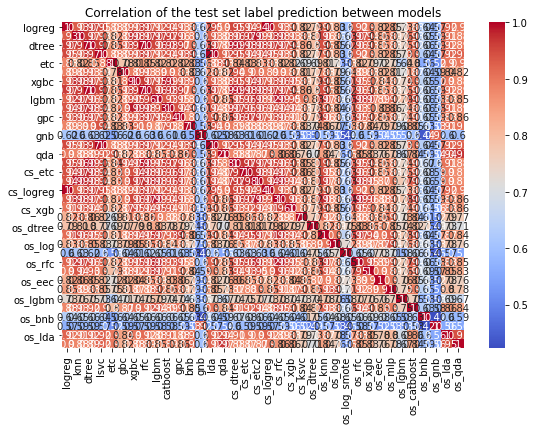

In [28]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [29]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_least_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]


def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [30]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 7))

Top Absolute Correlations
dtree    rfc          1.000000
lsvc     lda          1.000000
logreg   cs_logreg    1.000000
cs_rfc   os_rfc       0.989428
lgbm     cs_rfc       0.989428
cs_etc2  cs_rfc       0.989204
knn      cs_etc2      0.988970
dtype: float64


In [31]:
print("Least Absolute Correlations")
print(get_least_abs_correlations(pred, 6))

Least Absolute Correlations
os_bnb        os_gnb          0.422210
gnb           os_log_smote    0.437223
              os_bnb          0.438120
os_log_smote  os_gnb          0.454982
os_dtree      os_gnb          0.489905
gnb           os_dtree        0.506504
dtype: float64


In [58]:
sclf = StackingClassifier(estimators=
                              [('os_xgb', os_xgb.best_estimator_), 
                               ('os_knn', os_knn.best_estimator_), 
                               ('cs_etc2', cs_etc2.best_estimator_)
                              ], final_estimator=cs_etc)
sclf_param = {
              #'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf_grid = GridSearchCV(sclf, sclf_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('os_xgb',
                                                       Pipeline(memory=None,
                                                                steps=[('svmsmote',
                                                                        SVMSMOTE(k_neighbors=2,
                                                                                 m_neighbors=10,
                                                                                 n_jobs=None,
                                                                                 out_step=0.5,
                                                                                 random_state=None,
                                                                                 sampling_strategy='auto',
                                                                                 svm_estimator=Non

In [60]:
print(f'Best Mean Cross Validation Score is {sclf_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf_grid.best_params_}')
print(f'Train score is {sclf_grid.score(X_train,y_train)}')
print(f'Test score is {sclf_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.865605973721844
Best Mean Cross Validation Score is {'stack_method': 'predict_proba'}
Train score is 0.9480932203389831
Test score is 0.8108108108108107


In [65]:
pickle.dump(sclf_grid, open('stackingclassifier1.sav', 'wb'))

In [59]:
sclf2 = StackingClassifier(estimators=
                              [('os_xgb', os_xgb.best_estimator_), 
                               ('os_knn', os_knn.best_estimator_), 
                               ('cs_etc2', cs_etc2.best_estimator_)
                              ], final_estimator=os_xgb)
sclf_param = {
              #'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('os_xgb',
                                                       Pipeline(memory=None,
                                                                steps=[('svmsmote',
                                                                        SVMSMOTE(k_neighbors=2,
                                                                                 m_neighbors=10,
                                                                                 n_jobs=None,
                                                                                 out_step=0.5,
                                                                                 random_state=None,
                                                                                 sampling_strategy='auto',
                                                                                 svm_estimator=Non

In [61]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8750481978034278
Best Mean Cross Validation Score is {'stack_method': 'predict_proba'}
Train score is 0.9726603575184017
Test score is 0.7984790874524714


In [66]:
pickle.dump(sclf2_grid, open('stackingclassifier2.sav', 'wb'))

In [67]:
sclf3 = StackingClassifier(estimators=
                              [('os_xgb', os_xgb.best_estimator_), 
                               ('os_mlp', os_mlp.best_estimator_), 
                               ('logreg', logreg.best_estimator_),
                               ('cs_dtree', cs_dtree.best_estimator_),
                               ('gbc', gbc.best_estimator_),
                               ('os_catboost', os_catboost.best_estimator_),
                              ], final_estimator=os_xgb)
sclf3_param = {
              #'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf3_grid = GridSearchCV(sclf3, sclf3_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf3_grid.fit(X_train,y_train)

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0963387	total: 14.9ms	remaining: 1.47s
1:	learn: 0.0309953	total: 29ms	remaining: 1.42s
2:	learn: 0.0190958	total: 42.2ms	remaining: 1.36s
3:	learn: 0.0143029	total: 55.5ms	remaining: 1.33s
4:	learn: 0.0125228	total: 71.4ms	remaining: 1.36s
5:	learn: 0.0108495	total: 85.1ms	remaining: 1.33s
6:	learn: 0.0100200	total: 98ms	remaining: 1.3s
7:	learn: 0.0090914	total: 111ms	remaining: 1.28s
8:	learn: 0.0082263	total: 124ms	remaining: 1.26s
9:	learn: 0.0077005	total: 137ms	remaining: 1.24s
10:	learn: 0.0074037	total: 150ms	remaining: 1.21s
11:	learn: 0.0072811	total: 163ms	remaining: 1.19s
12:	learn: 0.0071836	total: 176ms	remaining: 1.17s
13:	learn: 0.0069845	total: 190ms	remaining: 1.16s
14:	learn: 0.0067962	total: 202ms	remaining: 1.14s
15:	learn: 0.0065470	total: 216ms	remaining: 1.13s
16:	learn: 0.0064367	total: 228ms	remaining: 1.11s
17:	learn: 0.0060406	total: 241ms	remaining: 1.1s
18:	learn: 0.0058908	total: 253ms	remaining: 1.08s
19:	learn: 0.0057397	total: 266ms	remain

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.0963860	total: 13ms	remaining: 1.29s
1:	learn: 0.0249650	total: 25.4ms	remaining: 1.24s
2:	learn: 0.0148080	total: 37.6ms	remaining: 1.22s
3:	learn: 0.0115498	total: 49.7ms	remaining: 1.19s
4:	learn: 0.0107478	total: 61.7ms	remaining: 1.17s
5:	learn: 0.0095311	total: 73.7ms	remaining: 1.15s
6:	learn: 0.0080400	total: 85.6ms	remaining: 1.14s
7:	learn: 0.0073084	total: 98ms	remaining: 1.13s
8:	learn: 0.0068769	total: 109ms	remaining: 1.11s
9:	learn: 0.0065701	total: 121ms	remaining: 1.09s
10:	learn: 0.0062222	total: 141ms	remaining: 1.14s
11:	learn: 0.0061300	total: 152ms	remaining: 1.11s
12:	learn: 0.0060617	total: 164ms	remaining: 1.1s
13:	learn: 0.0057621	total: 180ms	remaining: 1.1s
14:	learn: 0.0056314	total: 192ms	remaining: 1.09s
15:	learn: 0.0050465	total: 205ms	remaining: 1.08s
16:	learn: 0.0049254	total: 216ms	remaining: 1.06s
17:	learn: 0.0047942	total: 228ms	remaining: 1.04s
18:	learn: 0.0046503	total: 240ms	remaining: 1.02s
19:	learn: 0.0045506	total: 251ms	remai

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0752718	total: 14.2ms	remaining: 1.4s
1:	learn: 0.0355012	total: 27.7ms	remaining: 1.36s
2:	learn: 0.0162365	total: 40.7ms	remaining: 1.31s
3:	learn: 0.0113191	total: 54.7ms	remaining: 1.31s
4:	learn: 0.0096147	total: 68.2ms	remaining: 1.3s
5:	learn: 0.0083616	total: 81.8ms	remaining: 1.28s
6:	learn: 0.0078625	total: 95.2ms	remaining: 1.26s
7:	learn: 0.0070607	total: 108ms	remaining: 1.24s
8:	learn: 0.0067929	total: 121ms	remaining: 1.22s
9:	learn: 0.0066630	total: 134ms	remaining: 1.2s
10:	learn: 0.0063973	total: 147ms	remaining: 1.19s
11:	learn: 0.0060773	total: 160ms	remaining: 1.17s
12:	learn: 0.0057054	total: 173ms	remaining: 1.16s
13:	learn: 0.0057054	total: 182ms	remaining: 1.12s
14:	learn: 0.0055199	total: 195ms	remaining: 1.11s
15:	learn: 0.0053956	total: 211ms	remaining: 1.11s
16:	learn: 0.0051630	total: 235ms	remaining: 1.15s
17:	learn: 0.0047034	total: 256ms	remaining: 1.17s
18:	learn: 0.0044920	total: 273ms	remaining: 1.16s
19:	learn: 0.0044920	total: 282ms	rem

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.0783751	total: 12.8ms	remaining: 1.27s
1:	learn: 0.0210342	total: 25.4ms	remaining: 1.24s
2:	learn: 0.0129280	total: 37.2ms	remaining: 1.2s
3:	learn: 0.0109780	total: 49.1ms	remaining: 1.18s
4:	learn: 0.0106501	total: 60.9ms	remaining: 1.16s
5:	learn: 0.0094496	total: 72.8ms	remaining: 1.14s
6:	learn: 0.0085398	total: 84.9ms	remaining: 1.13s
7:	learn: 0.0071798	total: 96.8ms	remaining: 1.11s
8:	learn: 0.0062299	total: 109ms	remaining: 1.1s
9:	learn: 0.0057766	total: 120ms	remaining: 1.08s
10:	learn: 0.0056538	total: 132ms	remaining: 1.06s
11:	learn: 0.0054069	total: 143ms	remaining: 1.05s
12:	learn: 0.0053183	total: 154ms	remaining: 1.03s
13:	learn: 0.0047571	total: 167ms	remaining: 1.02s
14:	learn: 0.0045732	total: 178ms	remaining: 1.01s
15:	learn: 0.0043585	total: 190ms	remaining: 997ms
16:	learn: 0.0041549	total: 205ms	remaining: 1s
17:	learn: 0.0040345	total: 227ms	remaining: 1.03s
18:	learn: 0.0040345	total: 240ms	remaining: 1.02s
19:	learn: 0.0039788	total: 254ms	rema

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.1179379	total: 14.3ms	remaining: 1.41s
1:	learn: 0.0588524	total: 27.9ms	remaining: 1.37s
2:	learn: 0.0348924	total: 40.4ms	remaining: 1.3s
3:	learn: 0.0221495	total: 53ms	remaining: 1.27s
4:	learn: 0.0152202	total: 66.5ms	remaining: 1.26s
5:	learn: 0.0123748	total: 79.6ms	remaining: 1.25s
6:	learn: 0.0106775	total: 93.1ms	remaining: 1.24s
7:	learn: 0.0094133	total: 106ms	remaining: 1.21s
8:	learn: 0.0085005	total: 118ms	remaining: 1.19s
9:	learn: 0.0083918	total: 131ms	remaining: 1.18s
10:	learn: 0.0072045	total: 143ms	remaining: 1.16s
11:	learn: 0.0069829	total: 156ms	remaining: 1.14s
12:	learn: 0.0065324	total: 169ms	remaining: 1.13s
13:	learn: 0.0061513	total: 181ms	remaining: 1.11s
14:	learn: 0.0060196	total: 194ms	remaining: 1.1s
15:	learn: 0.0057727	total: 211ms	remaining: 1.1s
16:	learn: 0.0057726	total: 228ms	remaining: 1.11s
17:	learn: 0.0056305	total: 246ms	remaining: 1.12s
18:	learn: 0.0053618	total: 259ms	remaining: 1.1s
19:	learn: 0.0053618	total: 268ms	remain

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.1229850	total: 12.9ms	remaining: 1.28s
1:	learn: 0.0481827	total: 24.7ms	remaining: 1.21s
2:	learn: 0.0286772	total: 37.1ms	remaining: 1.2s
3:	learn: 0.0174962	total: 48.4ms	remaining: 1.16s
4:	learn: 0.0135232	total: 59.7ms	remaining: 1.13s
5:	learn: 0.0107197	total: 71.4ms	remaining: 1.12s
6:	learn: 0.0097358	total: 82.1ms	remaining: 1.09s
7:	learn: 0.0095554	total: 91.8ms	remaining: 1.05s
8:	learn: 0.0082098	total: 103ms	remaining: 1.04s
9:	learn: 0.0080266	total: 115ms	remaining: 1.03s
10:	learn: 0.0075647	total: 126ms	remaining: 1.02s
11:	learn: 0.0071198	total: 137ms	remaining: 1.01s
12:	learn: 0.0068965	total: 148ms	remaining: 993ms
13:	learn: 0.0062467	total: 160ms	remaining: 982ms
14:	learn: 0.0061473	total: 171ms	remaining: 969ms
15:	learn: 0.0059125	total: 182ms	remaining: 957ms
16:	learn: 0.0057223	total: 194ms	remaining: 948ms
17:	learn: 0.0055520	total: 208ms	remaining: 949ms
18:	learn: 0.0053934	total: 231ms	remaining: 986ms
19:	learn: 0.0052936	total: 247ms	

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0903155	total: 13.3ms	remaining: 1.32s
1:	learn: 0.0551093	total: 26.4ms	remaining: 1.29s
2:	learn: 0.0299159	total: 39.9ms	remaining: 1.29s
3:	learn: 0.0232394	total: 52.7ms	remaining: 1.26s
4:	learn: 0.0153319	total: 66.3ms	remaining: 1.26s
5:	learn: 0.0120535	total: 79.2ms	remaining: 1.24s
6:	learn: 0.0103597	total: 92.1ms	remaining: 1.22s
7:	learn: 0.0095522	total: 105ms	remaining: 1.2s
8:	learn: 0.0092303	total: 117ms	remaining: 1.19s
9:	learn: 0.0089162	total: 130ms	remaining: 1.17s
10:	learn: 0.0079642	total: 143ms	remaining: 1.15s
11:	learn: 0.0077323	total: 155ms	remaining: 1.14s
12:	learn: 0.0077322	total: 164ms	remaining: 1.1s
13:	learn: 0.0069585	total: 177ms	remaining: 1.09s
14:	learn: 0.0065417	total: 190ms	remaining: 1.07s
15:	learn: 0.0064098	total: 204ms	remaining: 1.07s
16:	learn: 0.0061340	total: 224ms	remaining: 1.09s
17:	learn: 0.0060096	total: 244ms	remaining: 1.11s
18:	learn: 0.0058417	total: 256ms	remaining: 1.09s
19:	learn: 0.0058416	total: 266ms	re

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.1034063	total: 12.9ms	remaining: 1.28s
1:	learn: 0.0343322	total: 24.5ms	remaining: 1.2s
2:	learn: 0.0217537	total: 36.1ms	remaining: 1.17s
3:	learn: 0.0185196	total: 47.6ms	remaining: 1.14s
4:	learn: 0.0143648	total: 58.3ms	remaining: 1.11s
5:	learn: 0.0132606	total: 69.4ms	remaining: 1.09s
6:	learn: 0.0111372	total: 80.6ms	remaining: 1.07s
7:	learn: 0.0105504	total: 91.8ms	remaining: 1.05s
8:	learn: 0.0096222	total: 103ms	remaining: 1.04s
9:	learn: 0.0084813	total: 114ms	remaining: 1.03s
10:	learn: 0.0081692	total: 126ms	remaining: 1.01s
11:	learn: 0.0078904	total: 137ms	remaining: 1s
12:	learn: 0.0074019	total: 148ms	remaining: 989ms
13:	learn: 0.0071564	total: 159ms	remaining: 976ms
14:	learn: 0.0068278	total: 170ms	remaining: 964ms
15:	learn: 0.0065031	total: 181ms	remaining: 950ms
16:	learn: 0.0063658	total: 206ms	remaining: 1s
17:	learn: 0.0063098	total: 222ms	remaining: 1.01s
18:	learn: 0.0060730	total: 234ms	remaining: 999ms
19:	learn: 0.0059353	total: 246ms	remain

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0824610	total: 13.4ms	remaining: 1.32s
1:	learn: 0.0316032	total: 26.5ms	remaining: 1.3s
2:	learn: 0.0187187	total: 40.4ms	remaining: 1.31s
3:	learn: 0.0101210	total: 53.6ms	remaining: 1.29s
4:	learn: 0.0098547	total: 66.3ms	remaining: 1.26s
5:	learn: 0.0087360	total: 79ms	remaining: 1.24s
6:	learn: 0.0084554	total: 91.8ms	remaining: 1.22s
7:	learn: 0.0080676	total: 104ms	remaining: 1.2s
8:	learn: 0.0080674	total: 115ms	remaining: 1.17s
9:	learn: 0.0076980	total: 128ms	remaining: 1.16s
10:	learn: 0.0074321	total: 141ms	remaining: 1.14s
11:	learn: 0.0072775	total: 154ms	remaining: 1.13s
12:	learn: 0.0071198	total: 167ms	remaining: 1.11s
13:	learn: 0.0069250	total: 180ms	remaining: 1.1s
14:	learn: 0.0067197	total: 192ms	remaining: 1.09s
15:	learn: 0.0062830	total: 205ms	remaining: 1.08s
16:	learn: 0.0060365	total: 227ms	remaining: 1.11s
17:	learn: 0.0058049	total: 248ms	remaining: 1.13s
18:	learn: 0.0058049	total: 258ms	remaining: 1.1s
19:	learn: 0.0056615	total: 271ms	remain

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.0771857	total: 12.9ms	remaining: 1.28s
1:	learn: 0.0335361	total: 25.1ms	remaining: 1.23s
2:	learn: 0.0144707	total: 36.9ms	remaining: 1.19s
3:	learn: 0.0101627	total: 48.6ms	remaining: 1.17s
4:	learn: 0.0093133	total: 60.3ms	remaining: 1.15s
5:	learn: 0.0091454	total: 71.6ms	remaining: 1.12s
6:	learn: 0.0085752	total: 82.7ms	remaining: 1.1s
7:	learn: 0.0085751	total: 90.6ms	remaining: 1.04s
8:	learn: 0.0082766	total: 102ms	remaining: 1.03s
9:	learn: 0.0080528	total: 113ms	remaining: 1.02s
10:	learn: 0.0079301	total: 125ms	remaining: 1.01s
11:	learn: 0.0077286	total: 136ms	remaining: 998ms
12:	learn: 0.0074844	total: 147ms	remaining: 987ms
13:	learn: 0.0072301	total: 159ms	remaining: 975ms
14:	learn: 0.0070825	total: 170ms	remaining: 964ms
15:	learn: 0.0069393	total: 182ms	remaining: 955ms
16:	learn: 0.0066113	total: 203ms	remaining: 990ms
17:	learn: 0.0063943	total: 222ms	remaining: 1.01s
18:	learn: 0.0062698	total: 233ms	remaining: 995ms
19:	learn: 0.0060620	total: 245ms	

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0934602	total: 13.6ms	remaining: 1.34s
1:	learn: 0.0249026	total: 26.6ms	remaining: 1.3s
2:	learn: 0.0177350	total: 39.3ms	remaining: 1.27s
3:	learn: 0.0138298	total: 52.9ms	remaining: 1.27s
4:	learn: 0.0119934	total: 66.8ms	remaining: 1.27s
5:	learn: 0.0095607	total: 79.8ms	remaining: 1.25s
6:	learn: 0.0091904	total: 92.2ms	remaining: 1.22s
7:	learn: 0.0085681	total: 105ms	remaining: 1.21s
8:	learn: 0.0082423	total: 117ms	remaining: 1.19s
9:	learn: 0.0074342	total: 130ms	remaining: 1.17s
10:	learn: 0.0071054	total: 143ms	remaining: 1.16s
11:	learn: 0.0070214	total: 156ms	remaining: 1.14s
12:	learn: 0.0068093	total: 168ms	remaining: 1.13s
13:	learn: 0.0065723	total: 181ms	remaining: 1.11s
14:	learn: 0.0065720	total: 190ms	remaining: 1.08s
15:	learn: 0.0064402	total: 206ms	remaining: 1.08s
16:	learn: 0.0064401	total: 221ms	remaining: 1.08s
17:	learn: 0.0064389	total: 236ms	remaining: 1.07s
18:	learn: 0.0064388	total: 249ms	remaining: 1.06s
19:	learn: 0.0064388	total: 263ms	r

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.0828544	total: 13.6ms	remaining: 1.34s
1:	learn: 0.0235115	total: 25.8ms	remaining: 1.26s
2:	learn: 0.0132310	total: 37.3ms	remaining: 1.21s
3:	learn: 0.0096645	total: 48.9ms	remaining: 1.17s
4:	learn: 0.0088148	total: 60.1ms	remaining: 1.14s
5:	learn: 0.0085673	total: 71.2ms	remaining: 1.11s
6:	learn: 0.0082099	total: 82.2ms	remaining: 1.09s
7:	learn: 0.0080325	total: 93.5ms	remaining: 1.07s
8:	learn: 0.0074142	total: 105ms	remaining: 1.06s
9:	learn: 0.0070567	total: 116ms	remaining: 1.05s
10:	learn: 0.0069043	total: 127ms	remaining: 1.03s
11:	learn: 0.0063847	total: 139ms	remaining: 1.02s
12:	learn: 0.0062386	total: 150ms	remaining: 1s
13:	learn: 0.0059057	total: 161ms	remaining: 992ms
14:	learn: 0.0058286	total: 173ms	remaining: 979ms
15:	learn: 0.0056776	total: 185ms	remaining: 969ms
16:	learn: 0.0054966	total: 198ms	remaining: 965ms
17:	learn: 0.0049279	total: 217ms	remaining: 987ms
18:	learn: 0.0048151	total: 229ms	remaining: 974ms
19:	learn: 0.0046819	total: 239ms	re

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0702481	total: 19ms	remaining: 1.88s
1:	learn: 0.0251650	total: 32.8ms	remaining: 1.61s
2:	learn: 0.0178487	total: 46.5ms	remaining: 1.5s
3:	learn: 0.0137225	total: 59.9ms	remaining: 1.44s
4:	learn: 0.0109934	total: 74.1ms	remaining: 1.41s
5:	learn: 0.0104355	total: 87.1ms	remaining: 1.36s
6:	learn: 0.0087195	total: 102ms	remaining: 1.35s
7:	learn: 0.0083146	total: 115ms	remaining: 1.32s
8:	learn: 0.0072961	total: 128ms	remaining: 1.3s
9:	learn: 0.0069310	total: 141ms	remaining: 1.27s
10:	learn: 0.0065119	total: 154ms	remaining: 1.25s
11:	learn: 0.0062127	total: 168ms	remaining: 1.23s
12:	learn: 0.0059866	total: 180ms	remaining: 1.21s
13:	learn: 0.0057833	total: 197ms	remaining: 1.21s
14:	learn: 0.0054320	total: 210ms	remaining: 1.19s
15:	learn: 0.0053019	total: 227ms	remaining: 1.19s
16:	learn: 0.0051687	total: 250ms	remaining: 1.22s
17:	learn: 0.0049961	total: 265ms	remaining: 1.21s
18:	learn: 0.0047874	total: 278ms	remaining: 1.19s
19:	learn: 0.0045865	total: 291ms	remai

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.0955892	total: 12.6ms	remaining: 1.25s
1:	learn: 0.0332576	total: 24.8ms	remaining: 1.22s
2:	learn: 0.0197121	total: 37ms	remaining: 1.2s
3:	learn: 0.0129096	total: 48.7ms	remaining: 1.17s
4:	learn: 0.0094667	total: 60.7ms	remaining: 1.15s
5:	learn: 0.0086012	total: 72.1ms	remaining: 1.13s
6:	learn: 0.0080879	total: 83.3ms	remaining: 1.11s
7:	learn: 0.0070546	total: 95.2ms	remaining: 1.09s
8:	learn: 0.0068591	total: 107ms	remaining: 1.08s
9:	learn: 0.0061558	total: 118ms	remaining: 1.06s
10:	learn: 0.0055432	total: 130ms	remaining: 1.05s
11:	learn: 0.0053203	total: 141ms	remaining: 1.04s
12:	learn: 0.0049237	total: 153ms	remaining: 1.02s
13:	learn: 0.0049237	total: 161ms	remaining: 988ms
14:	learn: 0.0047274	total: 173ms	remaining: 979ms
15:	learn: 0.0044882	total: 184ms	remaining: 967ms
16:	learn: 0.0043424	total: 198ms	remaining: 964ms
17:	learn: 0.0040782	total: 214ms	remaining: 973ms
18:	learn: 0.0038992	total: 234ms	remaining: 998ms
19:	learn: 0.0038991	total: 242ms	re

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.1358138	total: 13.9ms	remaining: 1.37s
1:	learn: 0.0553745	total: 27.4ms	remaining: 1.34s
2:	learn: 0.0331416	total: 40.6ms	remaining: 1.31s
3:	learn: 0.0228226	total: 53.6ms	remaining: 1.29s
4:	learn: 0.0151787	total: 66.3ms	remaining: 1.26s
5:	learn: 0.0134199	total: 78.8ms	remaining: 1.23s
6:	learn: 0.0114816	total: 91.4ms	remaining: 1.21s
7:	learn: 0.0090407	total: 105ms	remaining: 1.2s
8:	learn: 0.0072601	total: 118ms	remaining: 1.19s
9:	learn: 0.0067919	total: 131ms	remaining: 1.18s
10:	learn: 0.0065025	total: 143ms	remaining: 1.16s
11:	learn: 0.0059107	total: 157ms	remaining: 1.15s
12:	learn: 0.0056137	total: 170ms	remaining: 1.14s
13:	learn: 0.0054491	total: 183ms	remaining: 1.12s
14:	learn: 0.0053234	total: 209ms	remaining: 1.18s
15:	learn: 0.0051475	total: 229ms	remaining: 1.2s
16:	learn: 0.0050685	total: 243ms	remaining: 1.18s
17:	learn: 0.0049686	total: 255ms	remaining: 1.16s
18:	learn: 0.0047040	total: 268ms	remaining: 1.14s
19:	learn: 0.0045736	total: 281ms	re

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.1096055	total: 13.7ms	remaining: 1.36s
1:	learn: 0.0475099	total: 25.7ms	remaining: 1.26s
2:	learn: 0.0226573	total: 38.5ms	remaining: 1.24s
3:	learn: 0.0173021	total: 50ms	remaining: 1.2s
4:	learn: 0.0159418	total: 61.7ms	remaining: 1.17s
5:	learn: 0.0128758	total: 73.7ms	remaining: 1.16s
6:	learn: 0.0104714	total: 85.6ms	remaining: 1.14s
7:	learn: 0.0092393	total: 97.7ms	remaining: 1.12s
8:	learn: 0.0083182	total: 109ms	remaining: 1.1s
9:	learn: 0.0073814	total: 121ms	remaining: 1.09s
10:	learn: 0.0070342	total: 133ms	remaining: 1.07s
11:	learn: 0.0069179	total: 144ms	remaining: 1.06s
12:	learn: 0.0066249	total: 156ms	remaining: 1.04s
13:	learn: 0.0063394	total: 168ms	remaining: 1.03s
14:	learn: 0.0062541	total: 180ms	remaining: 1.02s
15:	learn: 0.0059991	total: 191ms	remaining: 1s
16:	learn: 0.0058004	total: 206ms	remaining: 1s
17:	learn: 0.0055827	total: 227ms	remaining: 1.03s
18:	learn: 0.0052026	total: 241ms	remaining: 1.03s
19:	learn: 0.0050795	total: 252ms	remaining

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.1365624	total: 13.8ms	remaining: 1.37s
1:	learn: 0.0492865	total: 27.3ms	remaining: 1.34s
2:	learn: 0.0249687	total: 40.2ms	remaining: 1.3s
3:	learn: 0.0159382	total: 53.6ms	remaining: 1.29s
4:	learn: 0.0139004	total: 66.8ms	remaining: 1.27s
5:	learn: 0.0104540	total: 80.4ms	remaining: 1.26s
6:	learn: 0.0101887	total: 93ms	remaining: 1.24s
7:	learn: 0.0088917	total: 106ms	remaining: 1.22s
8:	learn: 0.0081824	total: 119ms	remaining: 1.2s
9:	learn: 0.0081823	total: 129ms	remaining: 1.16s
10:	learn: 0.0081822	total: 138ms	remaining: 1.12s
11:	learn: 0.0079133	total: 151ms	remaining: 1.11s
12:	learn: 0.0077488	total: 164ms	remaining: 1.09s
13:	learn: 0.0075269	total: 176ms	remaining: 1.08s
14:	learn: 0.0073420	total: 189ms	remaining: 1.07s
15:	learn: 0.0070438	total: 205ms	remaining: 1.08s
16:	learn: 0.0068824	total: 230ms	remaining: 1.12s
17:	learn: 0.0066749	total: 246ms	remaining: 1.12s
18:	learn: 0.0062508	total: 260ms	remaining: 1.11s
19:	learn: 0.0060778	total: 273ms	rema

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.1065160	total: 13.5ms	remaining: 1.33s
1:	learn: 0.0355426	total: 25.7ms	remaining: 1.26s
2:	learn: 0.0216262	total: 38.1ms	remaining: 1.23s
3:	learn: 0.0189689	total: 49.9ms	remaining: 1.2s
4:	learn: 0.0150272	total: 61.5ms	remaining: 1.17s
5:	learn: 0.0123838	total: 73.7ms	remaining: 1.15s
6:	learn: 0.0115122	total: 85.2ms	remaining: 1.13s
7:	learn: 0.0108440	total: 97.1ms	remaining: 1.12s
8:	learn: 0.0096150	total: 108ms	remaining: 1.1s
9:	learn: 0.0089957	total: 120ms	remaining: 1.08s
10:	learn: 0.0087459	total: 132ms	remaining: 1.07s
11:	learn: 0.0085458	total: 144ms	remaining: 1.05s
12:	learn: 0.0076722	total: 156ms	remaining: 1.04s
13:	learn: 0.0074693	total: 167ms	remaining: 1.03s
14:	learn: 0.0072565	total: 179ms	remaining: 1.01s
15:	learn: 0.0070822	total: 191ms	remaining: 1s
16:	learn: 0.0069503	total: 203ms	remaining: 990ms
17:	learn: 0.0065783	total: 217ms	remaining: 988ms
18:	learn: 0.0063912	total: 242ms	remaining: 1.03s
19:	learn: 0.0063910	total: 253ms	rema

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0718954	total: 15ms	remaining: 1.48s
1:	learn: 0.0183775	total: 29.1ms	remaining: 1.43s
2:	learn: 0.0148686	total: 42.7ms	remaining: 1.38s
3:	learn: 0.0101136	total: 56.1ms	remaining: 1.35s
4:	learn: 0.0096454	total: 69.5ms	remaining: 1.32s
5:	learn: 0.0093805	total: 82.3ms	remaining: 1.29s
6:	learn: 0.0080811	total: 96.1ms	remaining: 1.28s
7:	learn: 0.0078011	total: 110ms	remaining: 1.26s
8:	learn: 0.0077198	total: 122ms	remaining: 1.23s
9:	learn: 0.0076362	total: 134ms	remaining: 1.21s
10:	learn: 0.0072879	total: 147ms	remaining: 1.19s
11:	learn: 0.0070599	total: 160ms	remaining: 1.18s
12:	learn: 0.0070166	total: 172ms	remaining: 1.15s
13:	learn: 0.0070166	total: 181ms	remaining: 1.11s
14:	learn: 0.0068533	total: 194ms	remaining: 1.1s
15:	learn: 0.0066466	total: 207ms	remaining: 1.08s
16:	learn: 0.0065684	total: 224ms	remaining: 1.09s
17:	learn: 0.0065683	total: 241ms	remaining: 1.1s
18:	learn: 0.0065682	total: 255ms	remaining: 1.09s
19:	learn: 0.0065682	total: 266ms	rema

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.0802610	total: 12.2ms	remaining: 1.21s
1:	learn: 0.0253338	total: 23.9ms	remaining: 1.17s
2:	learn: 0.0165929	total: 35.3ms	remaining: 1.14s
3:	learn: 0.0138380	total: 46.7ms	remaining: 1.12s
4:	learn: 0.0096779	total: 58.1ms	remaining: 1.1s
5:	learn: 0.0088948	total: 69.3ms	remaining: 1.08s
6:	learn: 0.0086416	total: 80.5ms	remaining: 1.07s
7:	learn: 0.0084144	total: 91.6ms	remaining: 1.05s
8:	learn: 0.0079975	total: 103ms	remaining: 1.04s
9:	learn: 0.0071036	total: 114ms	remaining: 1.02s
10:	learn: 0.0069764	total: 125ms	remaining: 1.01s
11:	learn: 0.0069763	total: 133ms	remaining: 973ms
12:	learn: 0.0068961	total: 143ms	remaining: 960ms
13:	learn: 0.0066798	total: 155ms	remaining: 951ms
14:	learn: 0.0065943	total: 165ms	remaining: 937ms
15:	learn: 0.0061883	total: 177ms	remaining: 927ms
16:	learn: 0.0060417	total: 188ms	remaining: 918ms
17:	learn: 0.0059259	total: 199ms	remaining: 905ms
18:	learn: 0.0057733	total: 212ms	remaining: 902ms
19:	learn: 0.0056147	total: 234ms	

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0:	learn: 0.0633141	total: 16.8ms	remaining: 1.66s
1:	learn: 0.0308319	total: 32.1ms	remaining: 1.57s
2:	learn: 0.0139580	total: 47.5ms	remaining: 1.53s
3:	learn: 0.0124442	total: 62ms	remaining: 1.49s
4:	learn: 0.0095852	total: 76.9ms	remaining: 1.46s
5:	learn: 0.0091510	total: 91ms	remaining: 1.43s
6:	learn: 0.0076441	total: 106ms	remaining: 1.41s
7:	learn: 0.0073784	total: 120ms	remaining: 1.38s
8:	learn: 0.0072560	total: 135ms	remaining: 1.36s
9:	learn: 0.0069797	total: 149ms	remaining: 1.34s
10:	learn: 0.0068354	total: 164ms	remaining: 1.32s
11:	learn: 0.0066977	total: 178ms	remaining: 1.3s
12:	learn: 0.0065949	total: 191ms	remaining: 1.27s
13:	learn: 0.0064661	total: 207ms	remaining: 1.27s
14:	learn: 0.0062825	total: 233ms	remaining: 1.32s
15:	learn: 0.0061510	total: 249ms	remaining: 1.31s
16:	learn: 0.0060315	total: 263ms	remaining: 1.28s
17:	learn: 0.0057322	total: 278ms	remaining: 1.27s
18:	learn: 0.0056454	total: 293ms	remaining: 1.25s
19:	learn: 0.0055194	total: 307ms	remain

C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Udai Kumar Gupta\.conda\envs\buan6341_2020\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optim

0:	learn: 0.0862497	total: 14.5ms	remaining: 1.44s
1:	learn: 0.0238465	total: 28.1ms	remaining: 1.38s
2:	learn: 0.0169595	total: 41.4ms	remaining: 1.34s
3:	learn: 0.0129812	total: 54.4ms	remaining: 1.3s
4:	learn: 0.0113443	total: 68.2ms	remaining: 1.29s
5:	learn: 0.0091643	total: 80.9ms	remaining: 1.27s
6:	learn: 0.0088853	total: 93.4ms	remaining: 1.24s
7:	learn: 0.0085168	total: 106ms	remaining: 1.22s
8:	learn: 0.0082895	total: 119ms	remaining: 1.2s
9:	learn: 0.0076889	total: 132ms	remaining: 1.19s
10:	learn: 0.0074838	total: 144ms	remaining: 1.16s
11:	learn: 0.0070089	total: 157ms	remaining: 1.15s
12:	learn: 0.0067369	total: 170ms	remaining: 1.14s
13:	learn: 0.0064180	total: 183ms	remaining: 1.13s
14:	learn: 0.0062441	total: 200ms	remaining: 1.13s
15:	learn: 0.0060120	total: 223ms	remaining: 1.17s
16:	learn: 0.0058327	total: 237ms	remaining: 1.16s
17:	learn: 0.0056950	total: 251ms	remaining: 1.14s
18:	learn: 0.0056444	total: 264ms	remaining: 1.13s
19:	learn: 0.0055717	total: 276ms	re

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('os_xgb',
                                                       Pipeline(memory=None,
                                                                steps=[('svmsmote',
                                                                        SVMSMOTE(k_neighbors=2,
                                                                                 m_neighbors=10,
                                                                                 n_jobs=None,
                                                                                 out_step=0.5,
                                                                                 random_state=None,
                                                                                 sampling_strategy='auto',
                                                                                 svm_estimator=Non

In [68]:
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_params_}')
print(f'Train score is {sclf3_grid.score(X_train,y_train)}')
print(f'Test score is {sclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.872303842607422
Best Mean Cross Validation Score is {'stack_method': 'predict_proba'}
Train score is 0.92534174553102
Test score is 0.801526717557252


In [69]:
pickle.dump(sclf3_grid, open('stackingclassifier3.sav', 'wb'))

In [125]:
sclf4 = StackingClassifier(estimators=
                              [('etc', etc.best_estimator_), 
                               ('os_log_smote', os_log_smote.best_estimator_), 
                               ('os_lgbm', os_lgbm.best_estimator_),
                               ('cs_logreg', cs_logreg.best_estimator_),
                               ('logreg', logreg.best_estimator_),
                               ('catboost', catboost.best_estimator_),
                               ('lsvc', lsvc.best_estimator_),
                              ], final_estimator=sclf2)
sclf4_param = {
              #'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf4_grid = GridSearchCV(sclf4, sclf4_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf4_grid.fit(X_train,y_train)

0:	learn: 0.1101377	total: 7.02ms	remaining: 695ms
1:	learn: 0.0282752	total: 14ms	remaining: 685ms
2:	learn: 0.0178363	total: 21.4ms	remaining: 693ms
3:	learn: 0.0140787	total: 29.7ms	remaining: 712ms
4:	learn: 0.0129456	total: 37.3ms	remaining: 709ms
5:	learn: 0.0120323	total: 44.8ms	remaining: 702ms
6:	learn: 0.0115575	total: 52.1ms	remaining: 692ms
7:	learn: 0.0114681	total: 59.4ms	remaining: 683ms
8:	learn: 0.0108674	total: 65.9ms	remaining: 667ms
9:	learn: 0.0107216	total: 73.2ms	remaining: 659ms
10:	learn: 0.0105550	total: 80.6ms	remaining: 652ms
11:	learn: 0.0103011	total: 87.8ms	remaining: 644ms
12:	learn: 0.0101226	total: 95.6ms	remaining: 640ms
13:	learn: 0.0099469	total: 103ms	remaining: 631ms
14:	learn: 0.0098949	total: 110ms	remaining: 623ms
15:	learn: 0.0098133	total: 117ms	remaining: 615ms
16:	learn: 0.0095459	total: 125ms	remaining: 610ms
17:	learn: 0.0094595	total: 132ms	remaining: 602ms
18:	learn: 0.0093890	total: 140ms	remaining: 595ms
19:	learn: 0.0091486	total: 14

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('etc',
                                                       ExtraTreesClassifier(bootstrap=False,
                                                                            ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='entropy',
                                                                            max_depth=8,
                                                                            max_features='auto',
                                                                            max_leaf_nodes=None,
                                                                            max_samples=None,
                                                                            min_impurity_decrease=

In [126]:
print(f'Best Mean Cross Validation Score is {sclf4_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf4_grid.best_params_}')
print(f'Train score is {sclf4_grid.score(X_train,y_train)}')
print(f'Test score is {sclf4_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.870151903399058
Best Mean Cross Validation Score is {'stack_method': 'predict_proba'}
Train score is 0.9218750000000002
Test score is 0.8237547892720307


In [33]:
from xgboost import XGBClassifier
sclf5 = StackingClassifier(estimators=
                              [('dtree', dtree.best_estimator_), 
                               ('rfc', rfc.best_estimator_), 
                               ('lsvc', lsvc.best_estimator_),
                              ], final_estimator=os_xgb)
sclf5_param = {
              'stack_method':['auto', 'predict_proba']
             }
sclf5_grid = GridSearchCV(sclf5, sclf5_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf5_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('dtree',
                                                       DecisionTreeClassifier(ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=2,
                                                                              max_features=None,
                                                                              max_leaf_nodes=4,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                       

In [34]:
print(f'Best Mean Cross Validation Score is {sclf5_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf5_grid.best_params_}')
print(f'Train score is {sclf5_grid.score(X_train,y_train)}')
print(f'Test score is {sclf5_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8771710913870434
Best Mean Cross Validation Score is {'stack_method': 'auto'}
Train score is 0.944386149003148
Test score is 0.801526717557252


In [35]:
pickle.dump(sclf5_grid, open('stackingclassifier5.sav', 'wb'))

In [36]:
from xgboost import XGBClassifier
sclf6 = StackingClassifier(estimators=
                              [('dtree', dtree.best_estimator_), 
                               ('rfc', rfc.best_estimator_), 
                               ('lsvc', lsvc.best_estimator_),
                               ('lda', lda.best_estimator_),
                               ('logreg', logreg.best_estimator_),
                               ('os_rfc', os_rfc.best_estimator_),
                              ], final_estimator=os_xgb)
sclf6_param = {
              'stack_method':['auto', 'predict_proba']
             }
sclf6_grid = GridSearchCV(sclf6, sclf6_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf6_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('dtree',
                                                       DecisionTreeClassifier(ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=2,
                                                                              max_features=None,
                                                                              max_leaf_nodes=4,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                       

In [37]:
print(f'Best Mean Cross Validation Score is {sclf6_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf6_grid.best_params_}')
print(f'Train score is {sclf6_grid.score(X_train,y_train)}')
print(f'Test score is {sclf6_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8890022990595179
Best Mean Cross Validation Score is {'stack_method': 'predict_proba'}
Train score is 0.9282700421940927
Test score is 0.8108108108108107


In [43]:
sclf7 = StackingClassifier(estimators=
                              [('dtree', dtree.best_estimator_), 
                               ('rfc', rfc.best_estimator_), 
                               ('lsvc', lsvc.best_estimator_),
                               ('lda', lda.best_estimator_),
                               ('logreg', logreg.best_estimator_),
                               ('cs_logreg', cs_logreg.best_estimator_),
                               ('os_rfc', os_rfc.best_estimator_),
                               ('cs_rfc', cs_rfc.best_estimator_),
                              ], final_estimator=sclf2)
sclf7_param = {
              #'final_estimator__C' : [0.1,0.2],
    #'final_estimator__n_estimators': [20,40,50,60,70,75,80,90,100],
    #'final_estimator__max_depth': [2,4,5,6,7,8],
    #'final_estimator__subsample': [0.4,0.5,0.6,0.8,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf7_grid = GridSearchCV(sclf7, sclf7_param,cv=5, return_train_score=True,scoring=ftwo_scorer)
sclf7_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('dtree',
                                                       DecisionTreeClassifier(ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=2,
                                                                              max_features=None,
                                                                              max_leaf_nodes=4,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                       

In [44]:
print(f'Best Mean Cross Validation Score is {sclf7_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf7_grid.best_params_}')
print(f'Train score is {sclf7_grid.score(X_train,y_train)}')
print(f'Test score is {sclf7_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8862135196749937
Best Mean Cross Validation Score is {'stack_method': 'auto'}
Train score is 0.9282700421940927
Test score is 0.8108108108108107


In [38]:
pickle.dump(sclf6_grid, open('stackingclassifier6.sav', 'wb'))

In [8]:
filename = 'stackingclassifier6.sav'
loaded_model = pickle.load(open(filename, 'rb'))
test_data_labels = loaded_model.predict(df_test)

# Create predictions to be submitted!
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('solution_final.csv', index =False)  